### Calculating equilibrium compositions of an SiO-CO plasma

Calculations of plasmas arising from metallurgical processes are typically a lot more complicated than single-element systems. For example the plasma in an electric arc running above an oxide slag or sulphide matte in a smelting furnace may have multiple metallic elements and their molecules present in different proportions, together with carbon, oxygen, sulphur, and trace impurities. To illustrate this let's consider the case of a carbon monoxide & silicon monoxide plasma, such as one might obtain when heating pure SiO<sub>2</sub> in a reducing environment with carbon present.

A small text file in the JSON format must be generated by the user to specify the system. In this case we'll assume the presence of as many possible species obtained by combining silicon, carbon, and oxygen as we have data for, but it's important to be aware that such a "brute-force" approach may not always be the most expedient as the number of species rises; the expertise of the user in judging which species are of dominant importance in a particular plasma mixture becomes valuable in such cases. 

We'll go ahead and assume that all of O<sub>2</sub>, O<sub>2</sub><sup>+</sup>, O, O<sup>+</sup>, O<sup>2+</sup>, CO, CO<sup>+</sup>, C, C<sup>+</sup>, C<sup>2+</sup>, SiO, SiO<sup>+</sup>, Si, Si<sup>+</sup>, and Si<sup>2+</sup> are present, and let's also assume we are interested in the case of a 50/50 mixture (by mole) of CO and SiO. In this case the mixture file should look like this:
    
    {
        "name": "SiO-CO plasma, 50-50% mixture",
        "speciesList": 
        [
            { "species": "O2", "x0": 0 },
            { "species": "O2+", "x0": 0 },
            { "species": "O", "x0": 0 },
            { "species": "O+", "x0": 0 },
            { "species": "O++", "x0": 0 },
            { "species": "CO", "x0": 0.5 },
            { "species": "CO+", "x0": 0 },
            { "species": "C", "x0": 0 },
            { "species": "C+", "x0": 0 },
            { "species": "C++", "x0": 0 },
            { "species": "SiO", "x0": 0.5 },
            { "species": "SiO+", "x0": 0 },
            { "species": "Si", "x0": 0 },
            { "species": "Si+", "x0": 0 },
            { "species": "Si++", "x0": 0 }
        ]
    }

Note that we are fixing the elemental make-up of the plasma using mole fractions of the two diatomic species CO and SiO. What this really amounts to internally is telling minplascalc that "at all times during the calculation of the composition, you should have 1 atom of carbon and 1 atom of silicon for every 2 atoms of oxygen regardless of their proportionation between different species", thereby preserving the element balance for C, Si, and O. The JSON file for this case has already been generated and is available in the demo set of data packaged with minplascalc (at minplascalc/data/mixtures/SiCO_50_50_plasma.json). In order to calculate the composition of the plasma at various temperatures using these species, execute the following code snippets in order. The text in between indicates what each part of the code is doing.

We start off by importing the modules we need - matplotlib for drawing graphs, numpy for array functions, and minplascalc itself.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import minplascalc as mpc

Next, we create a minplascalc Mixture object using the path to the mixture file. The temperature in K and pressure in Pa may optionally be supplied to the constructor too, and will be initialised to those values.

In [2]:
mixture = mpc.Mixture(str(mpc.MIXTUREPATH / "SiCO_50_50_plasma.json"), 1000, 101325)

Next, set the range of temperatures to calculate the equilibrium compositions at - 1000 to 25000 K as in previous examples. Also initialise a list to store the composition result at each temperature

In [3]:
temperatures = np.linspace(1000, 25000, 100)
ni = [[] for n in range(len(mixture.species))]

Now we're ready to actually perform the composition calculations. We loop over all the temperatures, setting the mixture object's temperature attribute to the appropriate value, initialising the species numbers using the Mixture object's <span style="font-family: 'Courier';">initialiseNi(Ni)</span> function (which takes a list of the initial guesses of the $N_i$ value for each species), and calculating the LTE composition using the object's <span style="font-family: 'Courier';">solveGfe()</span> function. Note that execution of this calculation is fairly compute intensive (the more species present the more intensive it becomes) and the following code snippet may take a few tens of seconds to complete.

In [4]:
speciesnames = []
for T in temperatures:
    mixture.T = T
    mixture.initialiseNi([1e20 for n in range(len(mixture.species))])
    mixture.solveGfe()
    for j, sp in enumerate(mixture.species):
        ni[j].append(sp.numberDensity)
        speciesnames.append(sp.name)

Now we can go ahead and visualise the results by plotting the plasma composition against temperature, to see how it varies.

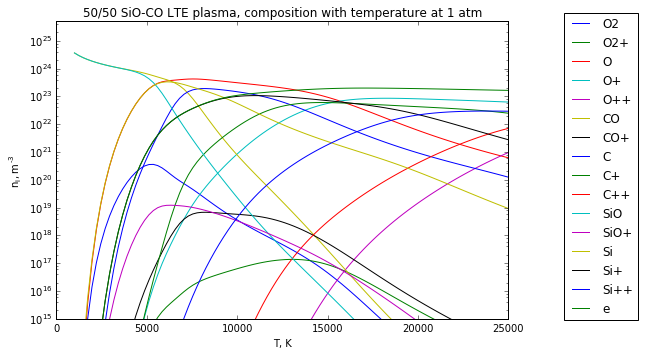

In [5]:
fig, ax0 = plt.subplots(1, 1, figsize=(7.5, 5))
ax0.set_title("50/50 SiO-CO LTE plasma, composition with temperature at 1 atm")
ax0.set_xlabel("T, K")
ax0.set_ylabel("$\mathregular{n_i, m^{-3}}$")
ax0.set_ylim(1e15, 5e25)
for spn, sn in zip(ni, speciesnames):
    ax0.semilogy(temperatures, spn, label=sn);
ax0.legend(bbox_to_anchor=(1.3, 1.05));
plt.tight_layout()

Whew, what a mess! It's hard to see what's going on in this complex plasma, so let's pull out just the silicon species and the pure oxygen species.

In [6]:
siliconspecies = ["SiO", "SiO+", "Si", "Si+", "Si++"]
silicon_speciesnames=[]
silicon_ni = []
for spn, sn in zip(ni, speciesnames):
    if sn in siliconspecies:
        silicon_speciesnames.append(sn)
        silicon_ni.append(spn)
oxygenspecies = ["O2", "O2+", "O", "O+", "O++"]
oxygen_speciesnames=[]
oxygen_ni = []
for spn, sn in zip(ni, speciesnames):
    if sn in oxygenspecies:
        oxygen_speciesnames.append(sn)
        oxygen_ni.append(spn)

Plotting those side by side we can start to see some more useful information.

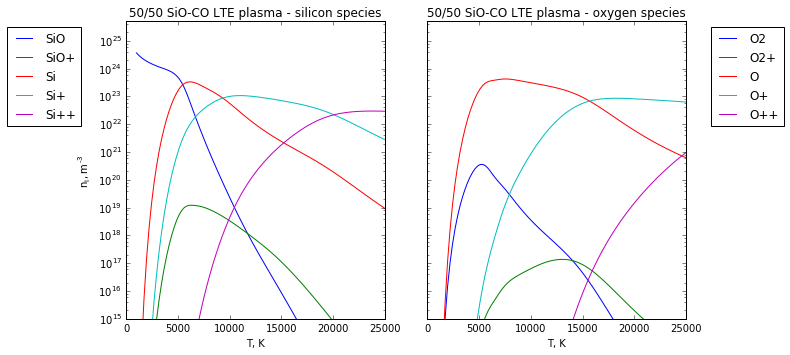

In [7]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
ax0.set_title("50/50 SiO-CO LTE plasma - silicon species")
ax0.set_xlabel("T, K")
ax0.set_ylabel("$\mathregular{n_i, m^{-3}}$")
ax0.set_ylim(1e15, 5e25)
for spn, sn in zip(silicon_ni, silicon_speciesnames):
    ax0.semilogy(temperatures, spn, label=sn);
ax0.legend(bbox_to_anchor=(-0.15, 1));
ax1.set_title("50/50 SiO-CO LTE plasma - oxygen species")
ax1.set_xlabel("T, K")
ax1.set_ylim(1e15, 5e25)
for spn, sn in zip(oxygen_ni, oxygen_speciesnames):
    ax1.semilogy(temperatures, spn, label=sn);
ax1.legend(bbox_to_anchor=(1.4, 1));
plt.tight_layout()

That's a bit better. Now we can see that the general behaviour of SiO in this mixture is quite similar to that of O<sub>2</sub> (see <a href="Tutorial 5 - Oxygen Plasma LTE Composition.ipynb">Tutorial 5</a>), with the difference that Si species are easier to ionise - this leads to higher concentrations of charged ions, particularly at lower temperatures. It also suggests that at higher temperatures, our calculation should probably be including Si<sup>3+</sup> as well. Pure oxygen species are largely absent from the plasma at low temperatures as one would expect (this is after all a CO-SiO plasma with no stoichiometrically free oxygen), but as dissociation and ionisation of the other species proceeds their concentrations rise and start to contribute significantly to the plasma composition.